<a href="https://colab.research.google.com/github/ferpinedot/SPF/blob/master/ExamenParcial_FernandaPinedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN PARCIAL I
Partiendo de que se desean generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responder los siguientes puntos:

**1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma pantalla, para validar que en realidad sí cumple la condición $t(x)\geq f(x)$.**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import scipy.stats as stats
import sympy 
from scipy import optimize
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import erlang

*Note que $f(x)$ debe ser una función acotada y con dominio finito* $a\leq x \leq b$ 


De acuerdo a esta función $f(x)$ el método propone los siguientes pasos. Asuma que podemos encontrar una función $t(x)$ tal que
$$t(x)\geq f(x), \quad \forall x$$
Note que la función $t(x)\geq 0$  no es una PDF debido a 
$$\int_{-\infty}^{\infty}t(x)dx\geq \int_{-\infty}^{\infty}f(x)dx =1$$


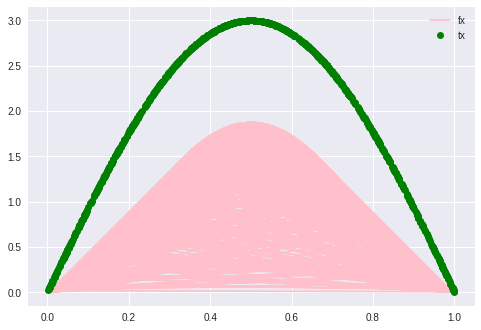

In [30]:
x = np.random.rand(1000)
a=3

fx=30*(x**2-2*x**3+x**4)




#integrar, encontra funcoion de distribucion y sobre eso invertirla
tx=a*np.sin(x*np.pi)


plt.plot(x,fx,'pink', label='fx')
plt.plot(x,tx,'go', label="tx")
plt.legend()
plt.show()

x = np.arange(0,1,0.01) 
#plt.plot(x,f(x), label='f(x)')
#plt.plot(x,t(x),label='t(x)')
#plt.legend()



**2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando algún editor de ecuaciones [Markdown (Latex)].**


Teniendo:
$$ y = a \sin(\pi x), \quad -a\leq y\leq a $$
entonces de acuerdo al método de Aceptación-Rechazo, $y$ debe ser integrada en el intervalo [0,1] como se muestra a continuación:
$$ \int_{0}^{1} a \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$$
entonces, este resultante será definido como:
$$c = \int_{0}^{1} a \sin(\pi x) dx = \frac{2a}{\pi}$$
entonces $g(x)$
$$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} = \frac{\pi \sin(\pi x)}{2}$$

**3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recordar que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente (similar al punto anterior) reportar todos los cálculos usando algún editor de ecuaciones [Markdown (Latex)].**


Siguiendo el método de la transformada inversa
$$g(x) = \frac{\pi \sin(\pi x)}{2} = P \longrightarrow \frac{2 P}{\pi} = \sin(\pi x) \longrightarrow \arccos(\frac{2 P}{\pi}) = \pi x $$
finalmente resulta que
$$ x = \frac{\arccos(\frac{2 P}{\pi})}{\pi} $$

para esta ecuación, $\arccos$ esta dado para el intervalo [-1,1], por lo que lo valores de $P$ que cumplen lo anterior son [$\frac{-\pi}{2}$,$\frac{\pi}{2}$]

In [0]:
def distribucion1(a,N):
    return (1/np.pi)*np.arccos((2*np.random.uniform(-np.pi/2,np.pi/2,N))/np.pi)

In [22]:
N = 10000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = distribucion1(a,N)
R1


array([0.72293318, 0.26250447, 0.51132741, ..., 0.77781616, 0.49309048,
       0.77832223])

**4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:**
![imagen.png](attachment:imagen.png)

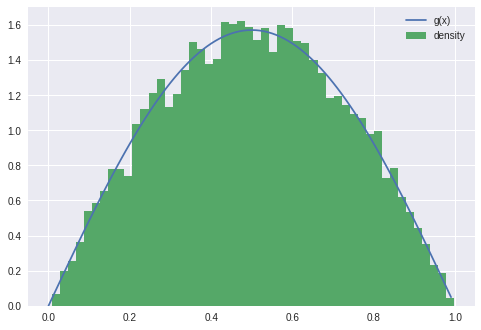

[1.875]


In [23]:
plt.plot(x,g(x),label='g(x)')
plt.hist(R1,bins = 50, density = True, label= 'density')
plt.legend()
plt.show()
print(c)

**5. Generar 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:**
![imagen.png](attachment:imagen.png)

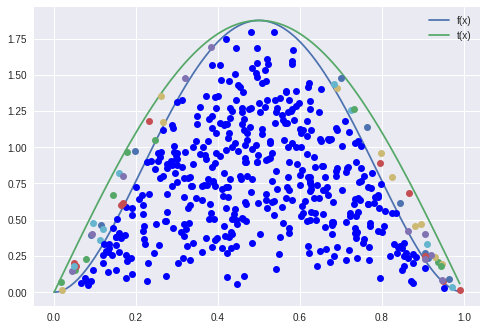

In [24]:
N = 500
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = distribucion1(a,N)
R2 = distribucion1(a,N)
Acep_rechazo(R2,R1,f,t)


El máximo de f es: [1.875]


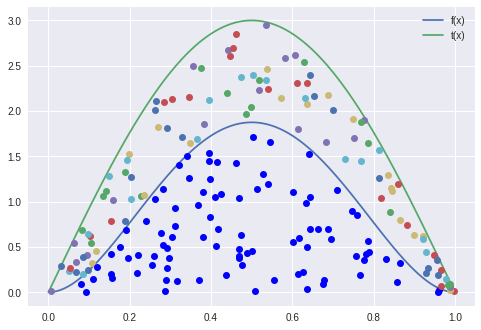

In [25]:
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t = lambda x:3*(np.sin(x*np.pi))
# Máximo de la función t
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Función de aceptación y rechazo
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()
    
# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

**6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir**

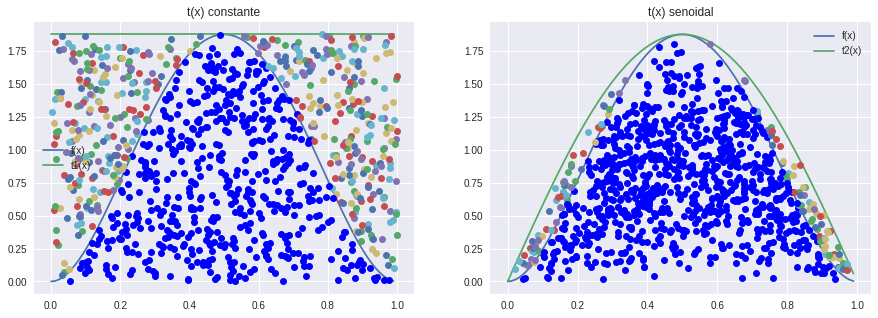

Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:
0.536
Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:
0.87


In [26]:
N = 1000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
c = f(optimize.fmin(lambda x: -f(x),0,disp=False))
a = c
t1 = lambda x: c*np.ones(len(x))
t2 = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.figure(figsize=(15,5))
#Primera Gráfica
plt.subplot(1,2,1)
plt.title('t(x) constante')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t1(x),label='t1(x)')
plt.legend()
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t1_x = t1(R1)
condicion = np.multiply(R2,t1_x) <= f_x
p1 = 0
p2 = 0
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t1_x[i],'ob')
        p1 += 1
    else:
        plt.plot(R1[i],R2[i]*t1_x[i],'o')
        p2 += 1
#Segunda Gráfica
plt.subplot(1,2,2)   
plt.title('t(x) senoidal')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t2(x),label='t2(x)')
plt.legend()
R3 = distribucion1(a,N)
R4 = distribucion1(a,N)
f_x = f(R3)
t2_x = t2(R3)
condicion = np.multiply(R4,t2_x) <= f_x
p3 = 0
p4 = 0
for i in range(N):
    if condicion[i]:
        plt.plot(R3[i],R4[i]*t2_x[i],'ob')
        p3 += 1
    else:
        plt.plot(R3[i],R4[i]*t2_x[i],'o')
        p4+= 1
plt.show()
print('Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:')
print(p1/N)
print('Del total de puntos con t(x) constante, el porcentaje dentro de f(x) fue de:')
print(p3/N)

7. Generar una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [2.109375]


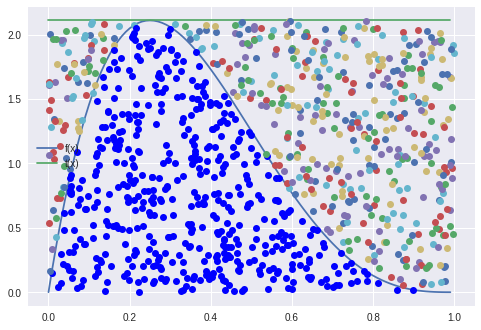

In [27]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x: 20*x*((1-x)**3)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 1000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R2,R1,f,t)

## Parámetros de entrega
Voy a habilitar un link en moodle donde deben de subir su cuaderno de python [o similar] con la solución de los problemas planteados de manera individual.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Alberto Arjona Cabrera.
</footer>